In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d as interpolation
from scipy.interpolate import lagrange
import functools

In [2]:
def uniform(n):
    return np.array([5*(-1+2*(i/n)) for i in range(n+1)])

def chebysev(n):
    return np.array([5*np.cos(np.pi*(i+0.5)/(n+1)) for i in range(n+1)])

def f(x):
    return 1/(1+x**2)

UNIFORM

In [3]:
ns = [10,20,30]
point_kind=[uniform, chebysev]



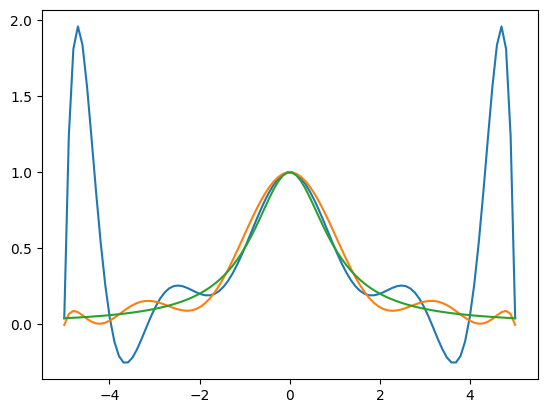

In [4]:
x = np.linspace(-5,5, 100)
for kind in point_kind:
    knots = kind(10)
    values = f(knots)
    inter = lagrange(knots, values)

    plt.plot(x, inter(x))
# plt.scatter(knots, values)
plt.plot(x, f(x))

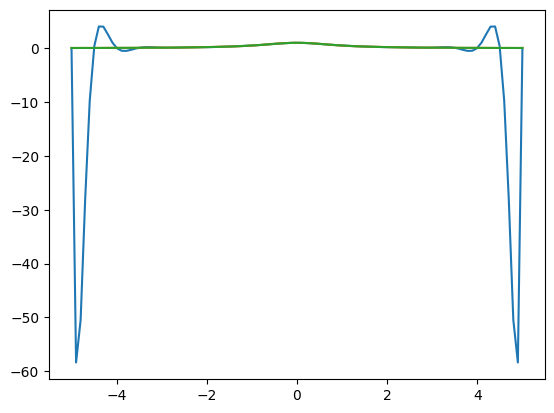

In [5]:
x = np.linspace(-5,5, 100)
for kind in point_kind:
    knots = kind(20)
    values = f(knots)
    inter = lagrange(knots, values)

    plt.plot(x, inter(x))
plt.plot(x, f(x))    

In [7]:
def lagranze_gen(knots):
    '''It returns a matrix with all the monomer terms of the lagranze polynomials'''
    def lagranze_basis(x, x_i, x_j):
            return (x-x_j)/(x_i-x_j)
    
    BASES=[]
    for i in range(len(knots)):  
        basis = []
        for j in range(len(knots)):
            if i!=j:
                basis.append(lambda x, x_i=knots[i], x_j=knots[j]: lagranze_basis(x, x_i, x_j))
            else:
                basis.append(lambda x: 1)
        BASES.append(basis)
                  
        
    return BASES

In [8]:
def evaluate_li(x, li):
    res = 1
    for j in range(len(li)):
        res*=li[j](x)
    return res

In [9]:
def find_max(x, L):
    y = abs(evaluate_li(x, L[0]))
    for i in range(1, len(L)):
        y+=abs(evaluate_li(x, L[i]))
    return max(y)

In [10]:
def Lebesque(n, func=uniform):
    x = np.linspace(-5,5,100)
    knots = func(n)
    L = lagranze_gen(knots)
    return find_max(x, L)
    

In [11]:
N = [10, 15,20,25,30,35,40,45,50]
Lebesque_val_chebysev = [Lebesque(n, func= chebysev) for n in N]
Lebesque_val_uniform = [Lebesque(n) for n in N]

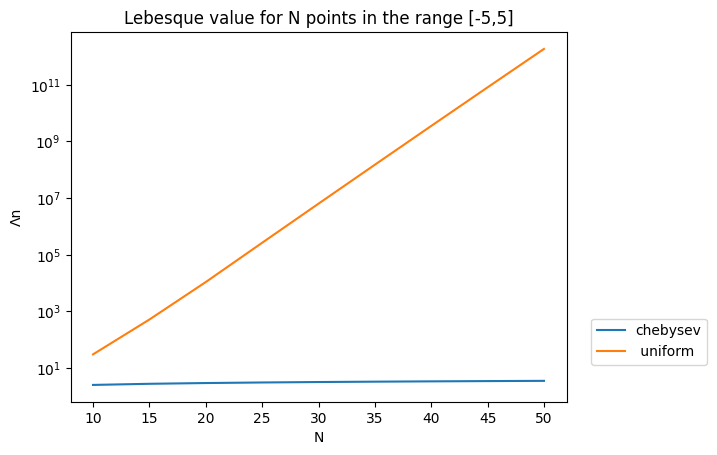

In [12]:
fig, ax = plt.subplots(1,1)
ax.plot(N, Lebesque_val_chebysev, label = 'chebysev')
ax.plot(N, Lebesque_val_uniform, label=' uniform')
ax.set(yscale='log', xlabel = 'N', ylabel = 'Λn', title='Lebesque value for N points in the range [-5,5]')
ax.legend(loc=(1.05,0.1))

c)

In [13]:
from scipy.stats import linregress

Y = np.log(Lebesque_val_uniform)
X = N

slope, intercept, *errors = linregress(X,Y)

In [14]:
slope

0.6258134277963289

In [15]:
knots=uniform(10)

In [16]:
knots

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [22]:
values = np.zeros(11)

In [23]:
values[1]=1

In [25]:
coeff = np.polyfit(knots, values, len(knots)-1)
l_1 = np.poly1d(coeff)

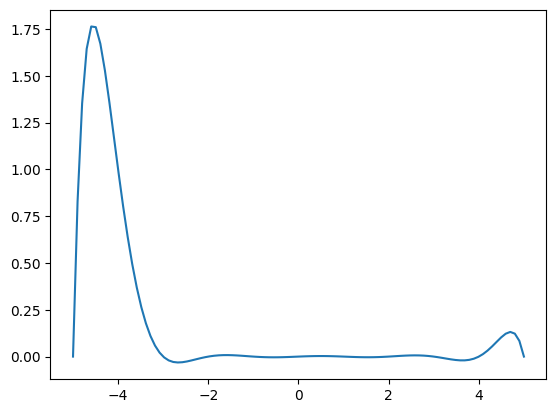

In [27]:
plt.plot(x, l_1(x))

In [28]:
def Lebesque_polynomial(knots, i):
    values = np.zeros(len(knots))
    values[i]=1
    return np.poly1d(np.polyfit(knots, values, len(knots)-1))

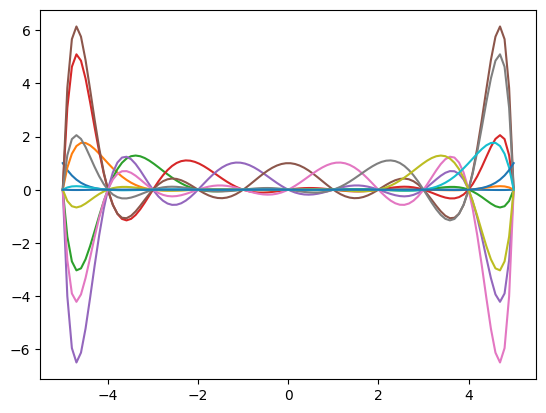

In [30]:
fig, ax = plt.subplots()
for i in range(len(knots)):
    plt.plot(x, Lebesque_polynomial(knots, i)(x))